In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("../../data/kgh_2005_beta.csv")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4754 entries, 0 to 4753
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Data        4754 non-null   object 
 1   Otwarcie    4754 non-null   float64
 2   Najwyzszy   4754 non-null   float64
 3   Najnizszy   4754 non-null   float64
 4   Zamkniecie  4754 non-null   float64
 5   Wolumen     4754 non-null   float64
 6   Zwrot       4753 non-null   float64
 7   Beta        4664 non-null   float64
dtypes: float64(7), object(1)
memory usage: 297.3+ KB
None


In [3]:
data['Data'] = pd.to_datetime(data['Data'])
data.dropna(inplace=True)

In [4]:
X = np.arange(len(data)).reshape(-1, 1)
y = data['Beta']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

In [7]:
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(1,), kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

model_cnn.compile(optimizer='adam', loss='mse')

In [8]:
model_cnn.fit(X_train, y_train, epochs=50, verbose=0)

In [10]:
def evaluate_model(model, model_name, X_test, y_test):
    test_loss = model.evaluate(X_test, y_test)
    predictions = model.predict(X_test)
    print(f'{model_name} Test Loss:', test_loss)
    return predictions

predictions_cnn = evaluate_model(model_cnn, 'Complex Neural Network', X_test, y_test)

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3960 
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Complex Neural Network Test Loss: 0.4112871587276459


In [11]:
predictions_cnn = evaluate_model(model_cnn, 'Complex Neural Network', X_test, y_test)

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3960
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Complex Neural Network Test Loss: 0.4112871587276459


In [12]:
test_dates = data['Data'].iloc[X_test.flatten()]

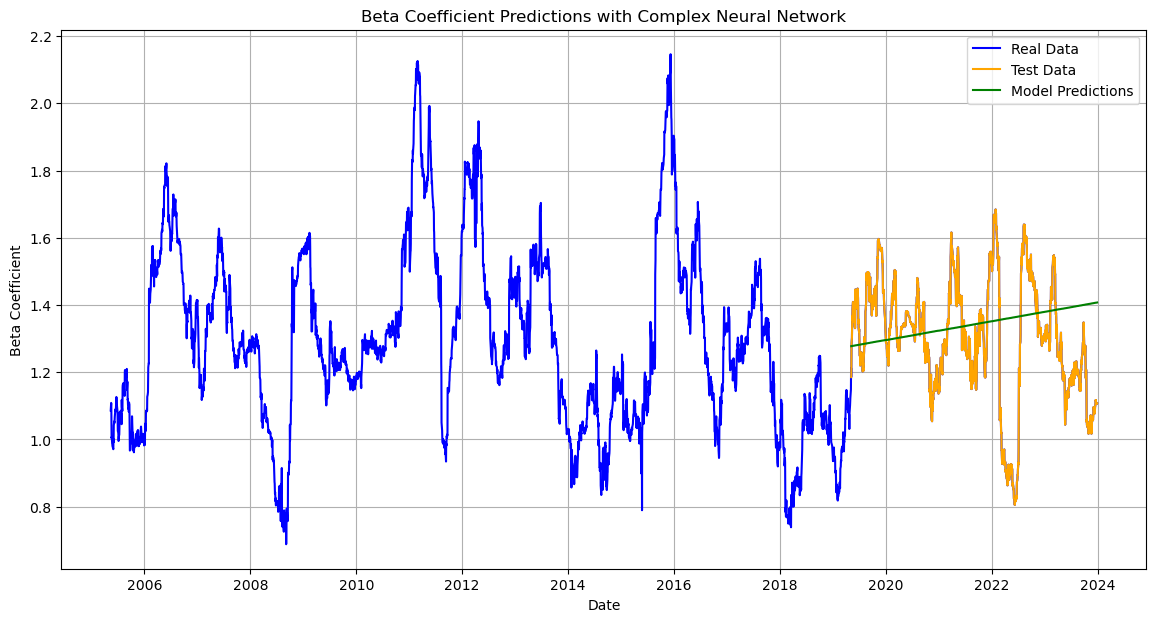

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(data['Data'], y, label='Real Data', color='blue', linewidth=1.5)
plt.plot(test_dates, y_test, label='Test Data', color='orange', linewidth=1.5)
plt.plot(test_dates, predictions_cnn.flatten(), label='Model Predictions', color='green', linewidth=1.5)
plt.title('Beta Coefficient Predictions with Complex Neural Network')
plt.xlabel('Date')
plt.ylabel('Beta Coefficient')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mae = mean_absolute_error(y_test, predictions_cnn.flatten())
rmse = mean_squared_error(y_test, predictions_cnn.flatten(), squared = False)

print("Mean Absolute Error (MAE):", mae)
print("Squared Mean Absolute Error (RMSE)", rmse)

Mean Absolute Error (MAE): 0.1530376785480972
Squared Mean Absolute Error (RMSE) 0.19631251552430584
